In [1]:
# import sys
# sys.path.insert(0, '../../src')

import quik_ai as qa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from importlib.metadata import version 
print('Quik-AI Version: %s' % version('quik_ai'))

Quik-AI Version: 1.3.1


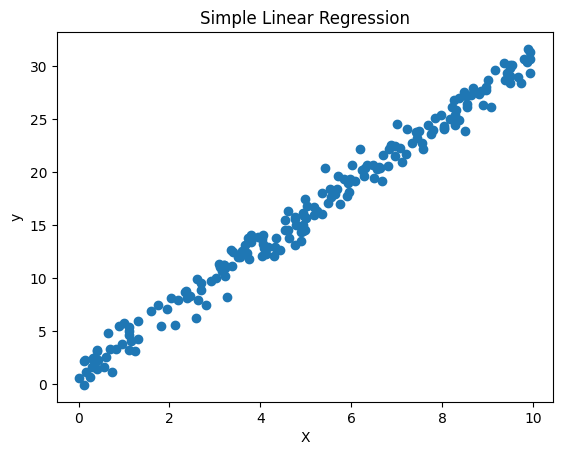

In [2]:
# creating a simple dataset
# X is the independent variable and y is the dependent variable
n = 200
data = pd.DataFrame({
    'X' : np.random.uniform(0, 10, n)
})
data['y'] = data.X * 3 + 1 + np.random.normal(0, 1, size=n)

plt.scatter(data.X, data.y, color = 'C0')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# plot over the numerical domain to estimate the joint distribution
# with the response
def plot_density(data, model):
    x_range = np.linspace(0, 10, 50)
    response_range = np.linspace(0, 30, 50)
    densities = []

    for x in x_range:
        # replace x to estimate the joint density
        # for this conditional distribution
        replaced_data = data.copy()
        replaced_data['X'] = x

        # get the predicted joint distribution
        density = np.mean(model.predict_distribution(replaced_data, response_range), axis=0)

        # append to the array
        densities.append(density)

    # format data for plotting
    x, y = np.meshgrid(x_range, response_range)
    densities = np.array(densities).T

    # plot contours
    plt.contourf(x, y, densities, cmap='viridis', levels=100)
    plt.colorbar()
    plt.title('Density Map')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

Checking for hyper-parameters to tune ...
No hyperparameters found
INFO:tensorflow:Oracle triggered exit
Round 1 best score: 1.4313


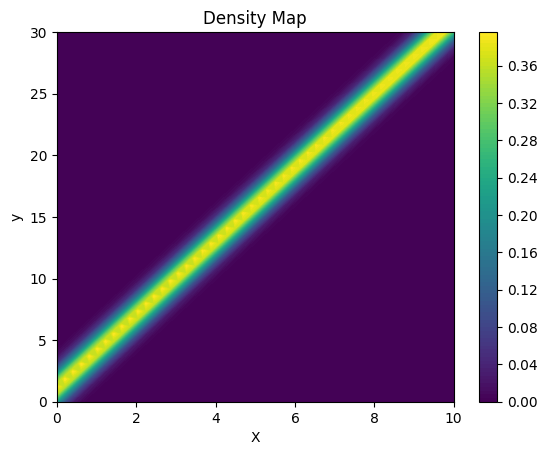

In [4]:
# create the driver, this will generate the tensorflow dataset and feed data
# also set the Noam optimizer
driver = qa.Driver(data, data, data, batch_size=13)

# what does our response look like?
head = qa.heads.GaussianMixture(non_linear_projection=False, mix_components=1)

# all the predictors for the model
predictors = [
    qa.predictors.Numerical('X'),
]

# what is our model architecture? This will store
# our model, driver, and any other information we use in training
# testing, saving, and loading needed for this problem
model = qa.models.ResNet('y', head, predictors, driver, model_dim=20, blocks=0, activation='relu', dropout=0, projection_scale=1)

# train the model, we can provide a hyperparameter tuner and other
# training parameters, by default we will use a custom BOHB tuner
model.train()

# plot the density
plot_density(data, model)

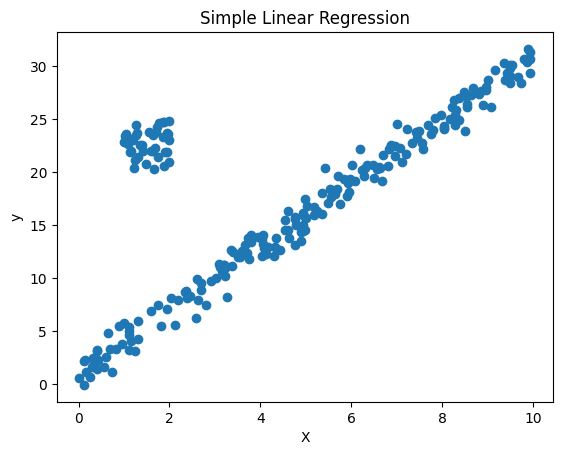

In [5]:
# add some outliers
n_o = 40
outliers = pd.DataFrame({
    'X' : np.random.uniform(1, 2, n_o),
    'y' : np.random.uniform(20, 25, n_o),
})

# append to data
data = pd.concat([data, outliers], ignore_index=True)

plt.scatter(data.X, data.y, color = 'C0')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Checking for hyper-parameters to tune ...
No hyperparameters found
INFO:tensorflow:Oracle triggered exit
Round 1 best score: 2.7223


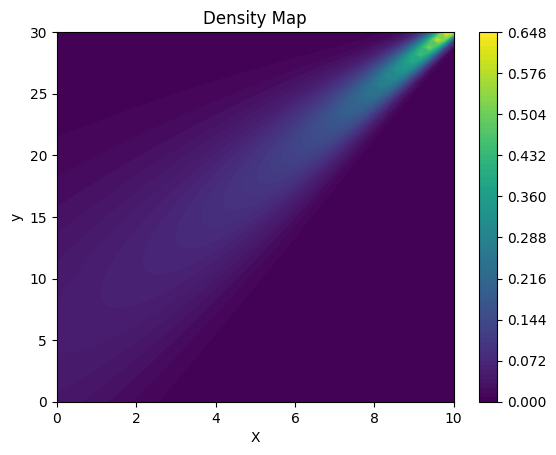

In [6]:
# create the driver
driver = qa.Driver(data, data, data, batch_size=13)

# recreate the model
model = qa.models.ResNet('y', head, predictors, driver, model_dim=20, blocks=0, activation='relu', dropout=0, projection_scale=1)

# train the model, we can provide a hyperparameter tuner and other
# training parameters, by default we will use a custom BOHB tuner
model.train()

# plot the density
plot_density(data, model)

Checking for hyper-parameters to tune ...
No hyperparameters found
INFO:tensorflow:Oracle triggered exit
Round 1 best score: 1.1920


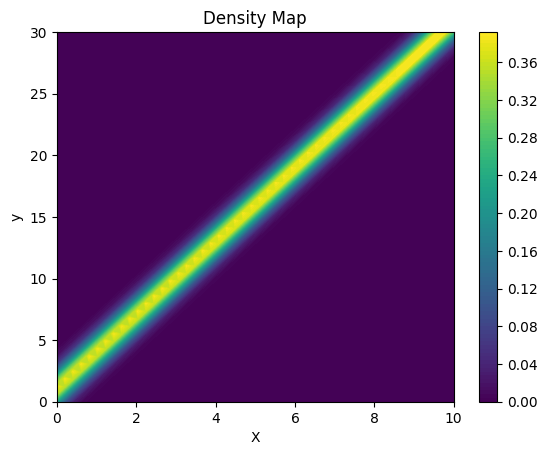

In [7]:
# append to data
data['w'] = [1] * n + [0] * n_o

# create the driver
driver = qa.Driver(data, data, data, batch_size=13, weights_column='w')

# recreate the model
model = qa.models.ResNet('y', head, predictors, driver, model_dim=20, blocks=0, activation='relu', dropout=0, projection_scale=1)

# train the model, we can provide a hyperparameter tuner and other
# training parameters, by default we will use a custom BOHB tuner
model.train()

# plot the density
plot_density(data, model)